In [1]:
import glob
import requests
import os
from collections import Counter

import joblib
from tqdm import tqdm

import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np


In [2]:
memory = joblib.Memory(cachedir=os.path.realpath('.'), verbose=0)

@memory.cache
def get_lex_ann_pairs(files):
    lex_ann_pairs = []

    for file in tqdm(files):
        text = open(file, "r").read()

        rq = {
            "user": "kchmura@student.agh.edu.pl",
            "lpmn": "any2txt|wcrft2|liner2({\"model\":\"n82\"})",
            "text": text,
        }

        rs = requests.post("http://ws.clarin-pl.eu/nlprest2/base/process", json=rq)
        
        tree = ET.fromstring(rs.text)
        for tok in tree.iterfind(".//tok"):
            try:
                lex = tok.find("lex").find("base").text
                for ann in tok.iterfind("./ann"):
                    ann_value = int(ann.text)
                    if ann_value > 0:
                        lex_ann_pairs.append((lex, ann.get("chan")))
            except Exception as e:
                print(e)
                
    return lex_ann_pairs
                
files = sorted(glob.glob("first_100/*.txt"))

lex_ann_pairs = get_lex_ann_pairs(files)


In [3]:
print(len(lex_ann_pairs))

17230


In [60]:
def draw_histogram(counter):
    labels, values = zip(*sorted(counter.items(), key=lambda x: x[1], reverse=True))
    labels = ["_".join(label.split("_")[1:]) for label in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.figure(figsize=(16, 9))
    plt.bar(indexes, values, width, edgecolor='black', linewidth=1.2)
    plt.xticks(indexes , labels, rotation=90)
    plt.show()

In [61]:
fine_grainded = [
    (lex, "_".join(ann.split("_")[:3]))
    for lex, ann in lex_ann_pairs
]

coarse_grainded = [
    (lex, "_".join(ann.split("_")[:2]))
    for lex, ann in lex_ann_pairs
]

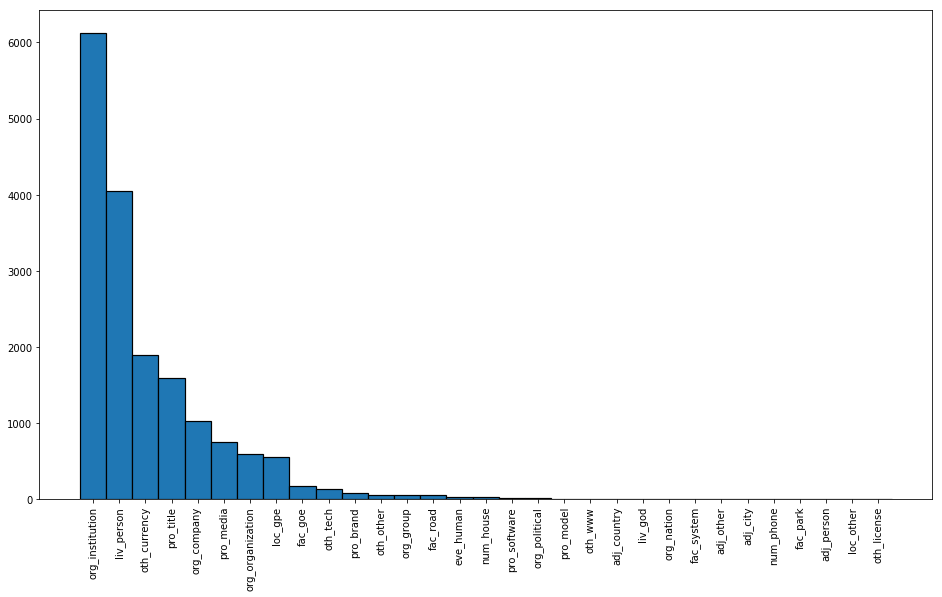

In [62]:
draw_histogram(
    Counter([x[1] for x in fine_grainded])
)

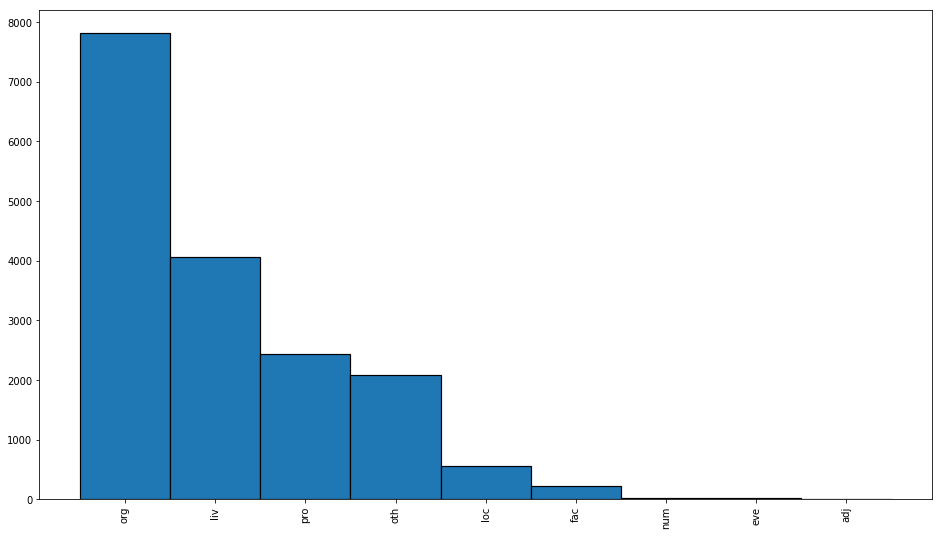

In [63]:
draw_histogram(
    Counter([x[1] for x in coarse_grainded])
)

In [66]:
most_common_words, _  =  zip(*Counter([lex for lex, _ in lex_ann_pairs]).most_common(100))

for w in most_common_words:
    print(w)
    anns = Counter([ann  for lex, ann in fine_grainded if lex == w ])
    for ann in sorted(anns.items(), key=lambda x:x[1], reverse=True):
        print(f"\t{ann[0]}: {ann[1]}")
              
        print()
    


złoty
	nam_oth_currency: 1879

.
	nam_liv_person: 973

	nam_pro_media: 350

	nam_org_company: 231

	nam_pro_title: 47

	nam_org_organization: 20

	nam_fac_goe: 17

	nam_oth_other: 7

	nam_fac_road: 3

	nam_org_institution: 2

sąd
	nam_org_institution: 1328

	nam_org_company: 7

	nam_pro_media: 7

	nam_org_organization: 2

	nam_liv_person: 2

	nam_fac_park: 1

	nam_fac_goe: 1

	nam_pro_brand: 1

M
	nam_liv_person: 637

	nam_org_organization: 118

	nam_org_company: 62

	nam_oth_other: 16

	nam_oth_tech: 13

	nam_fac_goe: 11

	nam_loc_gpe: 9

	nam_org_institution: 4

	nam_oth_license: 1

	nam_oth_currency: 1

rejonowy
	nam_org_institution: 468

okręgowy
	nam_org_institution: 387

w
	nam_org_institution: 273

	nam_pro_title: 27

	nam_org_organization: 16

	nam_liv_person: 6

	nam_fac_goe: 5

	nam_org_company: 2

L
	nam_liv_person: 280

	nam_org_company: 10

	nam_fac_goe: 6

	nam_org_organization: 4

	nam_org_institution: 3

	nam_loc_gpe: 3

	nam_fac_road: 3

	nam_oth_tech: 1

	nam_org_poli

In [68]:
_, coarse_grained_anns = zip(*[x for x in coarse_grainded])
coarse_grained_anns = sorted(set(coarse_grained_anns))

for coarse_ann in coarse_grained_anns:
    print(coarse_ann)
    words = Counter([lex  for lex, ann in coarse_grainded if ann == coarse_ann ])
    for w in sorted(words.items(), key=lambda x:x[1], reverse=True)[:10]:
        print(f"\t{w[0]}: {w[1]}")
        
    print()



nam_adj
	rosyjski: 4
	internetowy: 2
	rodzicielski: 1
	boży: 1
	polski: 1
	deweloperski: 1
	europejski: 1

nam_eve
	euro: 4
	bank: 4
	kodeks: 3
	karny: 3
	przedsiębiorstwo: 3
	usługa: 3
	zakres: 1
	znamię: 1
	czynnościowy: 1

nam_fac
	.: 20
	M: 11
	sekunda: 9
	L: 9
	szpital: 8
	spółdzielnia: 6
	w: 5
	k: 5
	ozdobny: 5
	sądowy: 5

nam_liv
	.: 973
	M: 637
	L: 280
	N: 209
	J: 171
	sekunda: 170
	bajt: 143
	k: 110
	D: 90
	a: 87

nam_loc
	Poznań: 59
	Warszawa: 55
	Łódź: 44
	katedra: 16
	Widzew: 15
	gdański: 14
	Katowice: 13
	śródmieście: 12
	Polska: 11
	Wolsztyn: 11

nam_num
	43: 7
	30: 4
	16: 3
	6: 2
	5: 2
	112: 2
	11: 1
	71: 1
	68: 1
	27: 1

nam_org
	sąd: 1337
	rejonowy: 468
	okręgowy: 387
	w: 291
	.: 253
	najwyższy: 200
	skarb: 188
	państwo: 188
	M: 184
	społeczny: 153

nam_oth
	złoty: 1879
	VAT: 40
	M: 31
	CD: 27
	III: 11
	Internet: 11
	D: 7
	IV: 7
	.: 7
	ZUS: 6

nam_pro
	.: 397
	u: 179
	dziennik: 127
	ustawa: 121
	z: 119
	o: 106
	dzień: 97
	Dzieje_(Apostolskie): 60
	rozporządzenie: 49
	m